In [ ]:
import numpy as np

np.random.seed(42)
m=100
X = 2* np.random.rand(m,1)
y = 4 + 3 * X + np.random.rand(m,1)

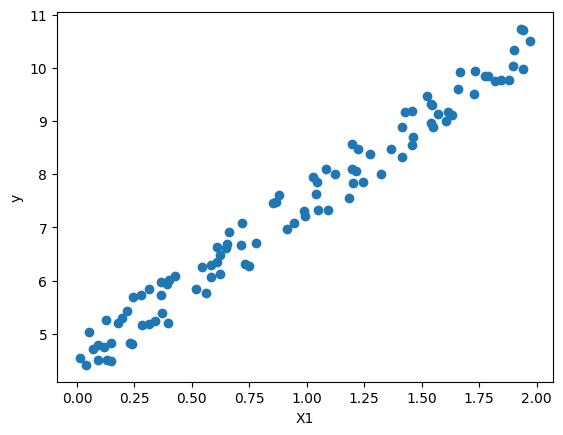

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.xlabel('X1')
plt.ylabel('y')
plt.show()

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b. T @ y

In [ ]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[ 4.51359766],
       [10.48006601]])

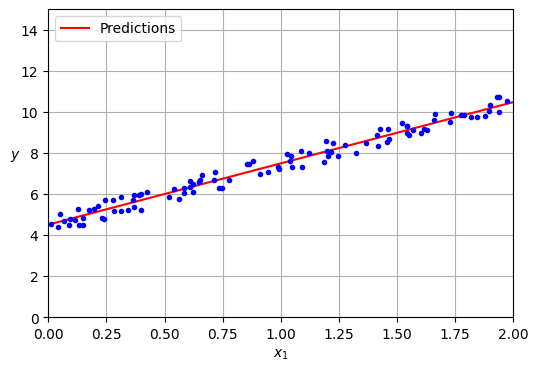

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_


(array([4.51359766]), array([[2.98323418]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

This function computes  X+y , where  X+  is the pseudoinverse of  X  (specifically the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly:

In [ ]:
np.linalg.pinv(X_b) @ y

array([[4.51359766],
       [2.98323418]])

In [ ]:
eta = 0.1
n_epochs = 1000
m = len(X_b)
np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  gradients = 2/m *X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients





In [ ]:
theta

array([[4.51359766],
       [2.98323418]])

In [ ]:
n_epochs = 50
t0,t1 = 5,50 # learning shedule parameters

def learning_schedule(t):
  return t0/(t+t1)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for iteration in range(m):
      random_index = np.random.randint(m)
      xi = X_b[random_index : random_index + 1]
      yi = y[random_index : random_index + 1]
      gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
      eta = learning_schedule(epoch * m + iteration)
      theta = theta - eta * gradients


In [ ]:
theta

array([[4.51548062],
       [2.9775157 ]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,tol=1e-5,penalty = None, eta0=0.01,n_iter_no_change=100,random_state=42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [ ]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.50316965]), array([2.99156535]))

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X ** 2 + np.random.randn(m,1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-0.21865419]), array([[-0.06633107,  0.56456263]]))

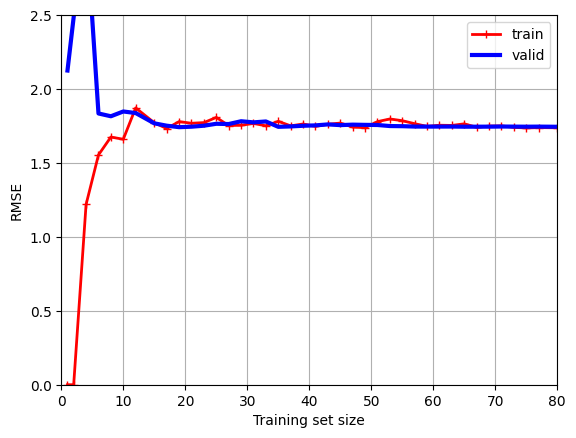

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(),X,y,train_sizes=np.linspace(0.01,1.0,40),
                                                         cv=5,scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)


plt.plot(train_sizes,train_errors,"r-+",linewidth = 2,label = "train")
plt.plot(train_sizes,valid_errors,"b-",linewidth = 3,label = "valid")
plt.grid()
plt.axis([0,80,0,2.5])
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.show()

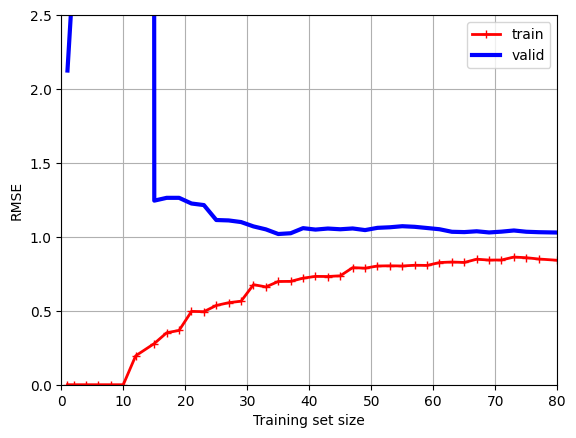

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regression =  make_pipeline(PolynomialFeatures(degree=10,include_bias=False),LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression,X,y,train_sizes=np.linspace(0.01,1.0,40),
                                                         cv=5,scoring = "neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis = 1)
valid_errors = -valid_scores.mean(axis = 1)


plt.plot(train_sizes,train_errors,"r-+",linewidth = 2,label = "train")
plt.plot(train_sizes,valid_errors,"b-",linewidth = 3,label = "valid")
plt.grid()
plt.axis([0,80,0,2.5])
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.3295296]])

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.38267537])

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.35974257])

In [ ]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

In [ ]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=2, random_state=42)

In [ ]:
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"].values

In [ ]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

need to add a bias term

In [ ]:
X_with_bias = np.c_[np.ones(len(X)),X]

In [ ]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - validation_size - test_size

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [ ]:
def to_one_hot(y):
    return np.diag(np.ones(y.max() + 1))[y]

In [ ]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [ ]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [ ]:
X_train[:,1]

array([4.7, 1.7, 6.9, 4.5, 4.8, 1.5, 3.6, 5.1, 4.5, 3.9, 5.1, 1.4, 1.3,
       1.5, 1.5, 4.7, 5.8, 3.9, 4.5, 5.6, 1.6, 4.9, 1.6, 5.6, 6.4, 5.2,
       5.8, 5.9, 1.4, 1.6, 1. , 1.5, 4.4, 1.6, 1.3, 5. , 4.5, 1.5, 1.4,
       1.5, 5.1, 4.5, 4.7, 1.3, 1.5, 3.7, 5.1, 5.5, 4.4, 6.1, 4.2, 6.6,
       4.5, 1.4, 6.7, 4.1, 1.4, 1.3, 1.9, 3.5, 4.9, 1.9, 1.6, 1.7, 4.2,
       1.5, 4.2, 6.7, 1.4, 4.3, 5. , 1.4, 4.8, 5.1, 4. , 4.5, 5.4, 4. ,
       1.7, 3.3, 5.3, 1.4, 1.2, 3.8, 5. , 1.5, 5.1, 1.5, 1.6, 4.8])

In [ ]:
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:, 1:].std(axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

In [ ]:
n_inputs = X_train.shape[1]  # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))  # == 3 (there are 3 iris classes)